# Assignment 2 Azizul Azman_UTM

Mounted at /content/drive
Index(['order_id', 'quantity', 'product_id', 'price', 'seller_id',
       'freight_value', 'customer_id', 'order_status', 'purchase_date',
       'payment_type', 'product_category_name', 'product_weight_gram'],
      dtype='object')
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-n

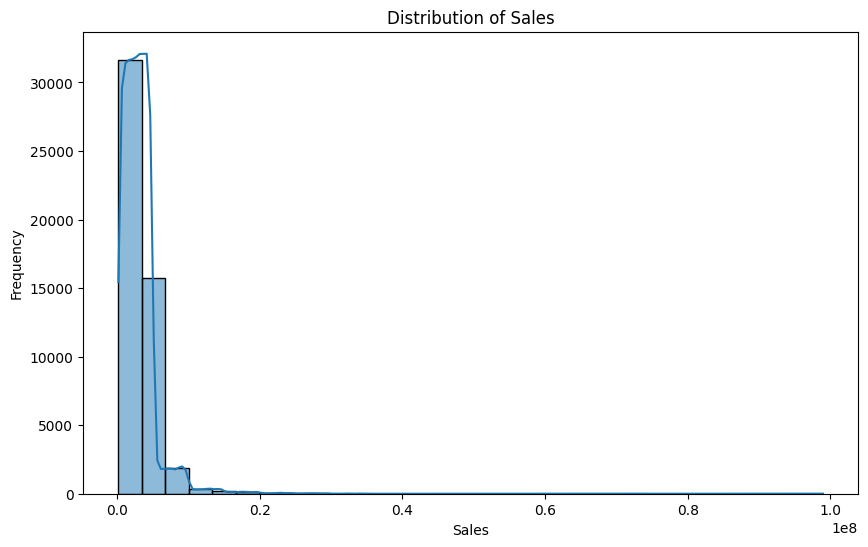

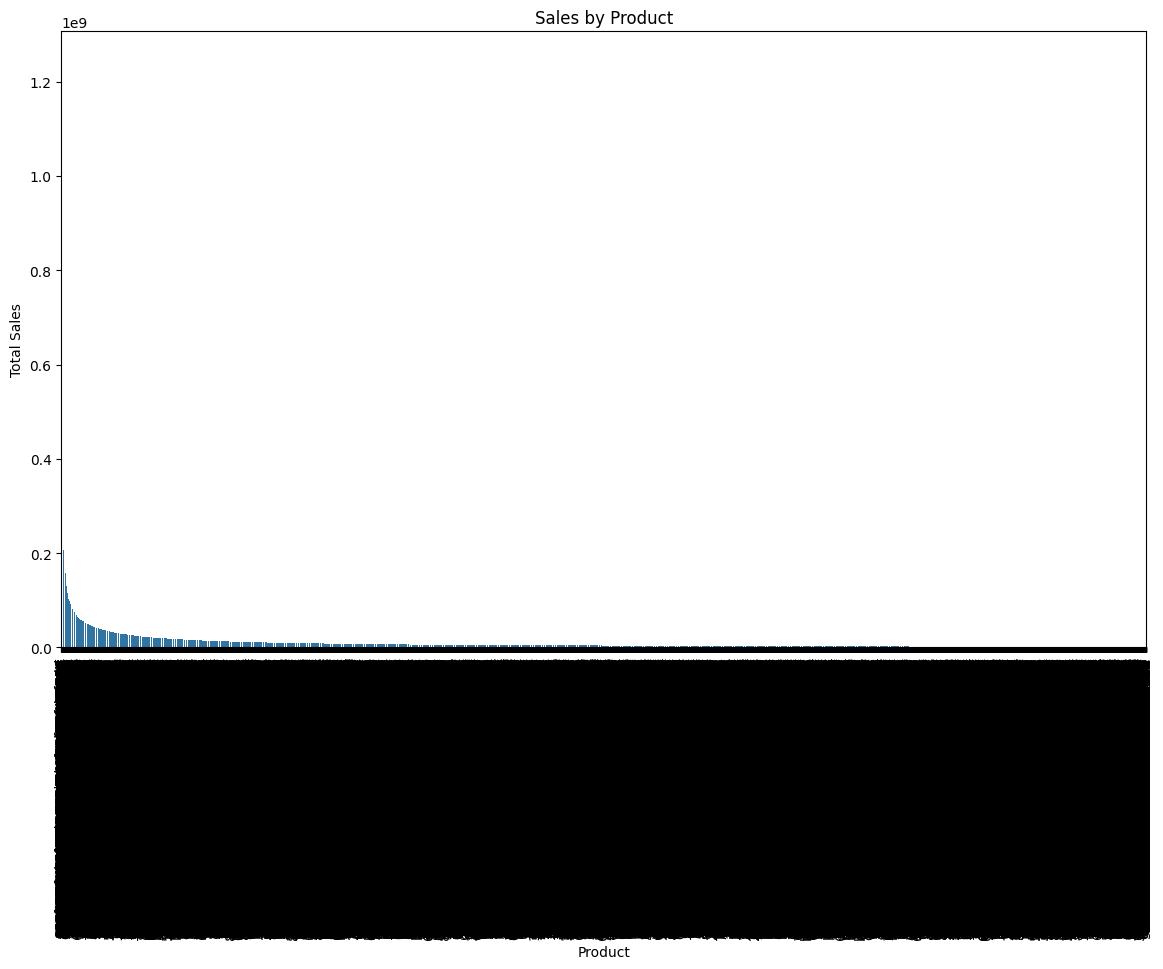

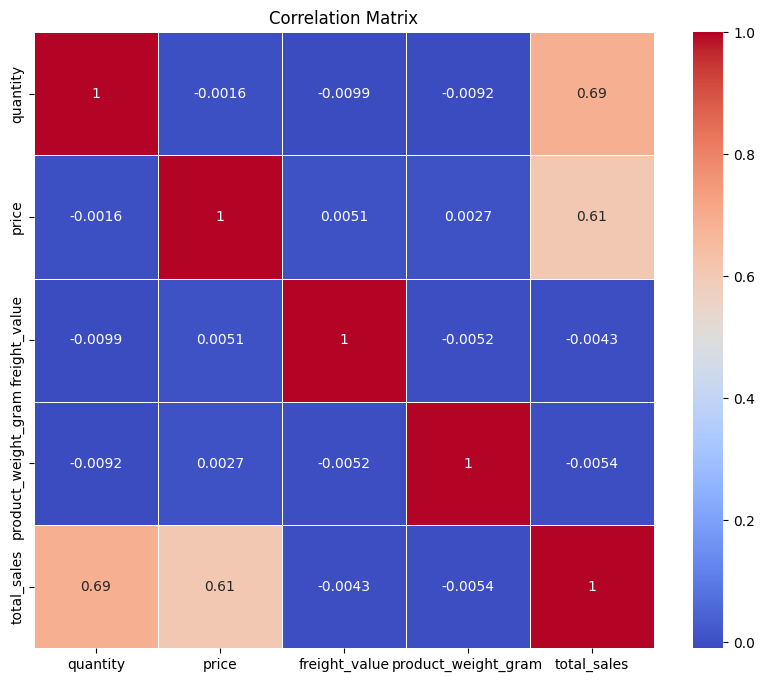

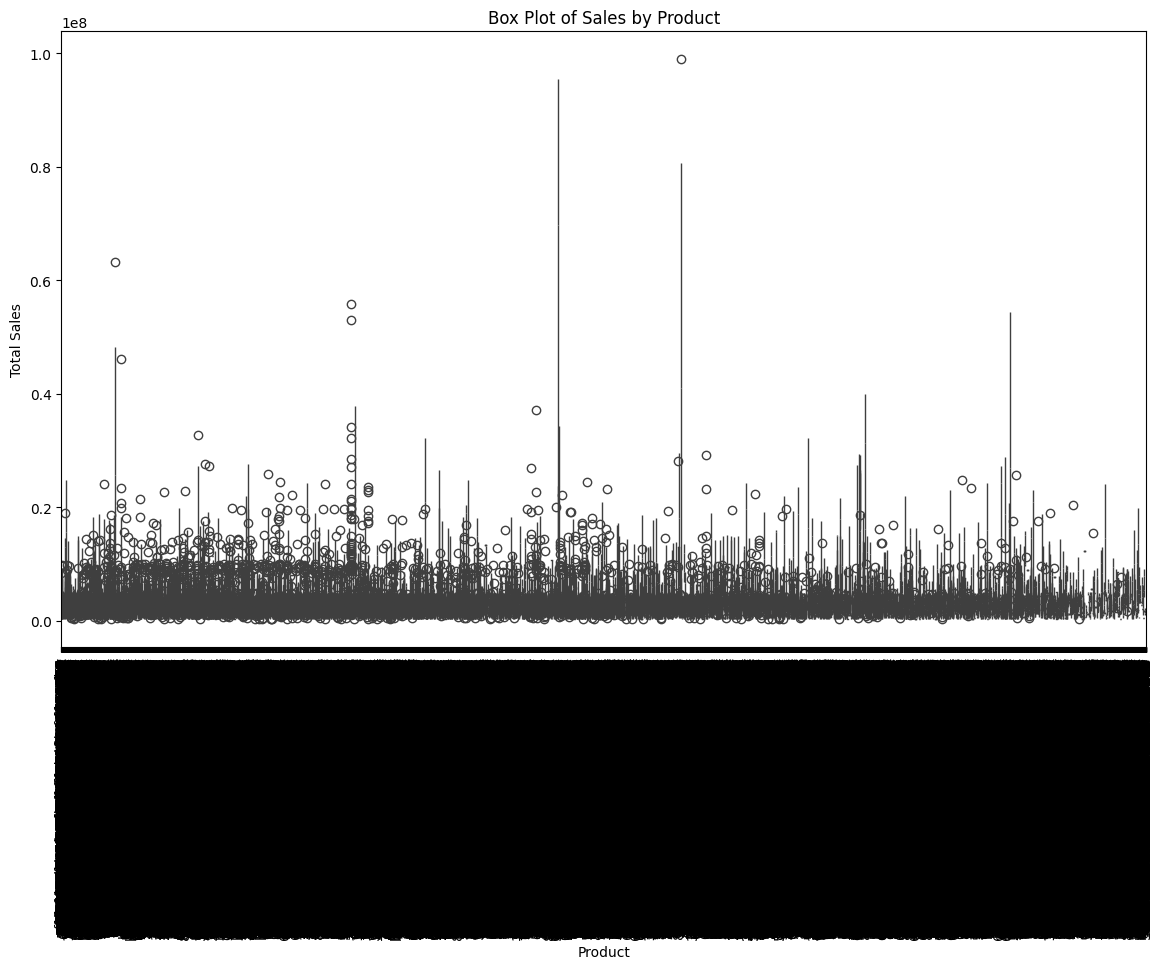

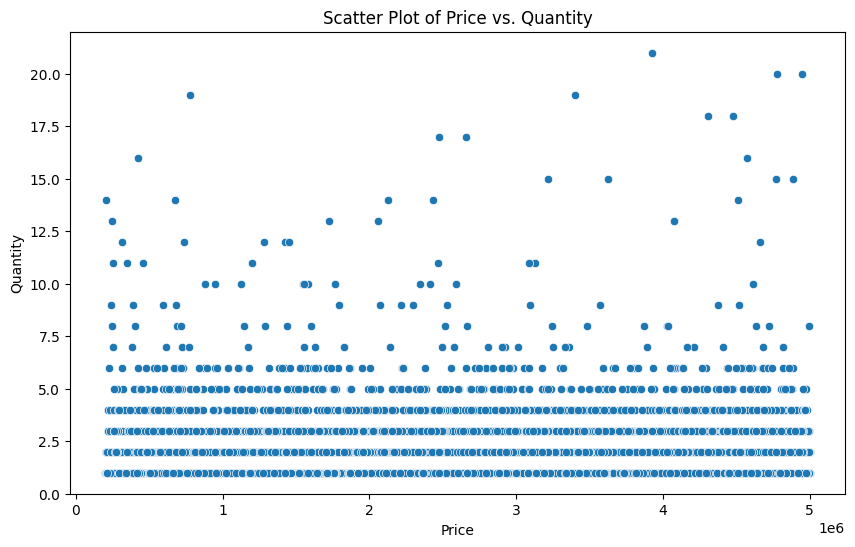

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/orderdataset.csv'  # Adjust the path as needed
data = pd.read_csv(file_path, delimiter=';')

# Print the column names to check for 'Sales' or a similar column
print(data.columns)

# Step 1: Check and clean the data
# Display basic information about the dataset
print("Dataset Information:")
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Identify numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns

# Fill missing values with the mean for numerical columns ONLY
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values with mode for categorical columns
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values = data.isnull().sum()
print("\nMissing Values after cleaning:\n", missing_values)

# Step 2: Summarize the data with statistical analysis
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)

# Aggregation functions
# Calculate 'total_sales' for each row
data['total_sales'] = data['price'] * data['quantity']
total_sales = data['total_sales'].sum()
average_sales = data['total_sales'].mean()
min_sales = data['total_sales'].min()
max_sales = data['total_sales'].max()
top_product_sales = data.groupby('product_id')['total_sales'].sum().sort_values(ascending=False).head(1)

print("\nTotal Sales:", total_sales)
print("Average Sales:", average_sales)
print("Minimum Sales:", min_sales)
print("Maximum Sales:", max_sales)
print("Top Product Sales:\n", top_product_sales)

# Step 3: Identify significant correlations/comparative/distribution/trends
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()  # Calculate correlation on numeric data only
print("\nCorrelation Matrix:\n", correlation_matrix)

# Step 4: Visualize the data with charts and graphs
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['total_sales'], bins=30, kde=True)  # Use 'total_sales' calculated earlier
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Sales by Product
plt.figure(figsize=(14, 8))
product_sales = data.groupby('product_id')['total_sales'].sum().sort_values(ascending=False)
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Sales by Product')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Additional raw graphs
# Box plot of sales by product
plt.figure(figsize=(14, 8))
sns.boxplot(x='product_id', y='total_sales', data=data)
plt.title('Box Plot of Sales by Product')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.show()

# Scatter plot of price vs. quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='quantity', data=data)
plt.title('Scatter Plot of Price vs. Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

# Line plot of sales over time (if there is a date column)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    sales_over_time = data.groupby('date')['total_sales'].sum()

    plt.figure(figsize=(12, 6))
    sales_over_time.plot()
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.show()